In [1]:
import hdf5storage
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,classification_report,roc_curve,auc

In [2]:
file='http.mat'
mat = hdf5storage.loadmat(file)
X=pd.DataFrame(mat['X'])
y=pd.DataFrame(mat['y'])

In [3]:
X[:5]

,0,1,2
0,-2.302585,5.371103,10.716107
1,-2.302585,5.088213,8.418058
2,-2.302585,5.464255,7.113224
3,-2.302585,5.451468,7.616825
4,-2.302585,5.476882,6.186414


In [4]:
y[:5]

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [5]:
def separate(X,y):
    data=pd.concat([X,y],axis=1)
    data.columns=[0,1,2,3]
    normal=data.loc[data[3]==0]
    abnormal=data.loc[data[3]==1]
    normal.drop([3],axis=1,inplace=True)
    abnormal.drop([3],axis=1,inplace=True)
    return normal,abnormal

In [6]:
def prepare_sets(X,y):
    X=np.array(X)
    y=np.array(y)
    X,X_test,y,y_test=train_test_split(X,y,test_size=0.2)
    X_train,X_dev,y_train,y_dev=train_test_split(X,y,test_size=0.25)
    return X_train,y_train,X_dev,y_dev,X_test,y_test

In [7]:
def model(X):
    ifor = IsolationForest(n_estimators=100, max_samples=256,contamination=0.0235)
    ifor.fit(X)
    return ifor

In [8]:
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1;
        else:
            y[i]=0
    return y

In [9]:
def model_evaluate(ifor,X,y):
    y_pred=ifor.predict(X)
    y_pred=convert(y_pred)
    s= 0.5 - ifor.decision_function(X)
    z=roc_auc_score(y,s)
    print('Report= ',classification_report(y,y_pred))
    print('AUCROC= ',z)
    print('F1= ',f1_score(y,y_pred))
    print('Confusion matrix= ',confusion_matrix(y,y_pred))

In [10]:
def roc_plot(model,X,y):
    preds= 0.5 - model.decision_function(X)
    fpr, tpr, threshold = roc_curve(y, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [11]:
normal,abnormal=separate(X,y)
X_train,y_train,X_dev,y_dev,X_test,y_test=prepare_sets(X,y)

/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
ifor=model(X_train)

/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


In [19]:
scores_n = 0.5 - ifor.decision_function(normal)

In [20]:
scores_ab= 0.5 - ifor.decision_function(abnormal)

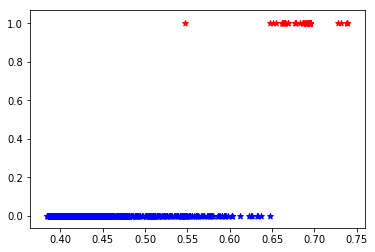

In [21]:
for i in range(1500):
        plt.scatter(scores_n[i],0,color='blue',marker='*')
for i in range(1500):
    plt.scatter(scores_ab[i],1,color='red',marker='*')

In [16]:
print('TRAIN')
model_evaluate(ifor,X_train,y_train)

TRAIN


/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Report=                precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    339170
         1.0       0.17      1.00      0.28      1328

   micro avg       0.98      0.98      0.98    340498
   macro avg       0.58      0.99      0.64    340498
weighted avg       1.00      0.98      0.99    340498

AUCROC=  0.9998068393217887
F1=  0.2844587352625938
Confusion matrix=  [[332495   6675]
 [     1   1327]]


In [17]:
print('DEV')
model_evaluate(ifor,X_dev,y_dev)

DEV


/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Report=                precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    113060
         1.0       0.16      1.00      0.27       440

   micro avg       0.98      0.98      0.98    113500
   macro avg       0.58      0.99      0.63    113500
weighted avg       1.00      0.98      0.99    113500

AUCROC=  0.9998345005869772
F1=  0.27295285359801486
Confusion matrix=  [[110716   2344]
 [     0    440]]


In [18]:
print('TEST')
model_evaluate(ifor,X_test,y_test)


TEST


/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Report=                precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    113057
         1.0       0.17      1.00      0.29       443

   micro avg       0.98      0.98      0.98    113500
   macro avg       0.58      0.99      0.64    113500
weighted avg       1.00      0.98      0.99    113500

AUCROC=  0.9997841836548579
F1=  0.2862694300518135
Confusion matrix=  [[110854   2203]
 [     1    442]]
